<center>
<h1>
Predicting House Prices
</h1></center>

### Objective : Check which factors are affecting House Price

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sc
import pandas_profiling

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\User

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import statsmodels.formula.api as sm

In [4]:
data=pd.read_csv("E:\Datasets\House_prices.csv")

In [5]:
pandas_profiling.ProfileReport(data)

Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,8.1 KiB
Average record size in memory,64.6 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [7]:
numeric_var_names=[ key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

In [8]:
print(numeric_var_names)
print(cat_var_names)

['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
['Brick', 'Neighborhood']


In [9]:
data_num=data[numeric_var_names]
data_cat=data[cat_var_names]

In [10]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [11]:
data_num = data_num.apply(outlier_capping)

In [12]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [13]:
for c_feature in data_cat.columns:
    data_cat[c_feature] = data_cat[c_feature].astype('category')
    data_cat = create_dummies(data_cat , c_feature )

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
data_cat

,Brick_Yes,Neighborhood_North,Neighborhood_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,1,0
6,1,0,1
7,0,0,1
8,0,0,0
9,0,0,0


In [15]:
data_new = pd.concat([data_num, data_cat], axis=1)

data_new.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,2.27,114300.0,1790.0,2.0,2.0,2.0,0,0,0
1,2.27,114200.0,2030.0,4.0,2.0,3.0,0,0,0
2,3.00,114800.0,1740.0,3.0,2.0,1.0,0,0,0
3,4.00,94700.0,1980.0,3.0,2.0,3.0,0,0,0
4,5.00,119800.0,2130.0,3.0,3.0,3.0,0,0,0


C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


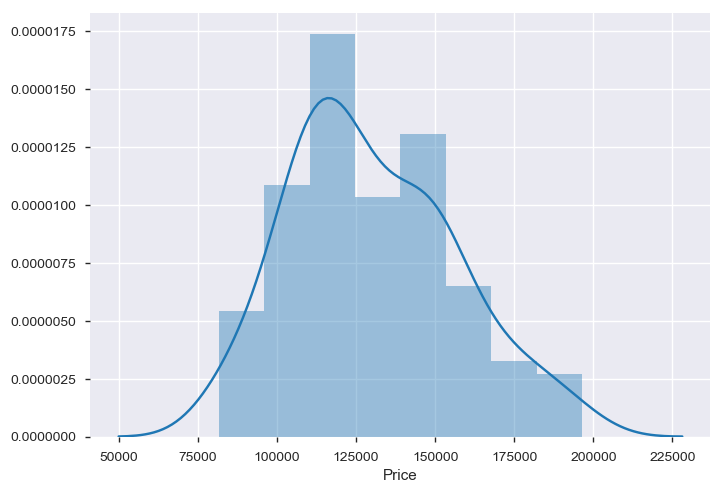

In [16]:
sns.distplot(data_new.Price)

In [17]:
corrm_house=data_new.corr()

In [18]:
corrm_house.to_csv('corrm_house.csv')

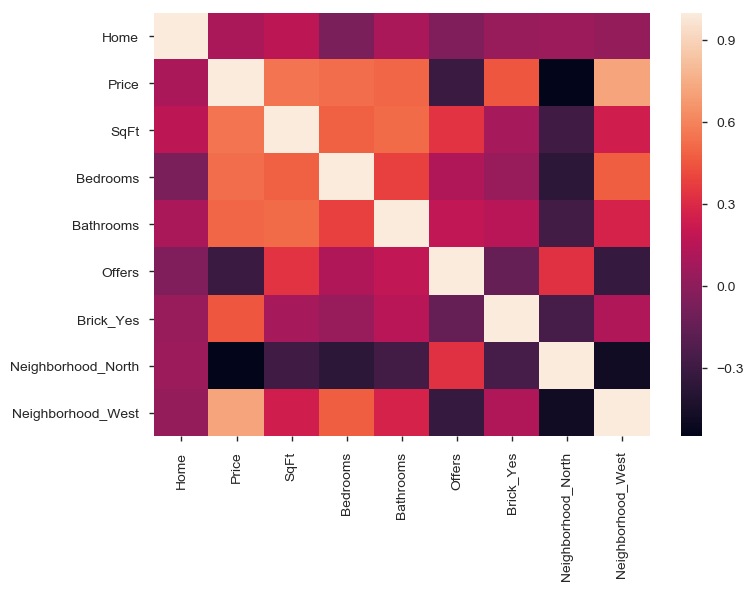

In [19]:
sns.heatmap(corrm_house)

In [20]:
features=data_new[data_new.columns.difference(['Price'])]
target=data_new['Price']

In [21]:
from sklearn.feature_selection import RFE
import itertools

In [22]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=5)
rfe = rfe.fit(features, target)

In [23]:
rfe.get_support()

array([ True,  True,  True, False, False,  True,  True, False])

In [24]:
features.columns

Index(['Bathrooms', 'Bedrooms', 'Brick_Yes', 'Home', 'Neighborhood_North',
       'Neighborhood_West', 'Offers', 'SqFt'],
      dtype='object')

In [25]:
RFE_features=features.columns[rfe.get_support()]
features1 = features[RFE_features]

In [26]:
features1

,Bathrooms,Bedrooms,Brick_Yes,Neighborhood_West,Offers
0,2.0,2.00,0,0,2.0
1,2.0,4.00,0,0,3.0
2,2.0,3.00,0,0,1.0
3,2.0,3.00,0,0,3.0
4,3.0,3.00,0,0,3.0
5,2.0,3.00,0,0,2.0
6,3.0,3.00,1,1,3.0
7,2.0,4.00,0,1,2.0
8,2.0,4.00,0,0,3.0
9,3.0,3.00,0,0,3.0


In [27]:
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [28]:
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [29]:
f_reg_results.sort_values(by=['F_Value'], ascending=False)

,Variable,F_Value,P_Value
5,Neighborhood_West,135.215505,0.000
4,Neighborhood_North,55.047264,0.000
7,SqFt,54.380853,0.000
1,Bedrooms,47.561903,0.000
0,Bathrooms,42.392215,0.000
2,Brick_Yes,32.481130,0.000
6,Offers,13.852960,0.000
3,Home,1.297635,0.257


In [30]:
list_var=['SqFt','Bedrooms','Bathrooms','Offers','Brick_Yes','Neighborhood_West','Neighborhood_North']

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [32]:
all_columns = "+".join(list_var)
my_formula = "Price~" + all_columns

In [33]:
my_formula

'Price~SqFt+Bedrooms+Bathrooms+Offers+Brick_Yes+Neighborhood_West+Neighborhood_North'

In [34]:
y, X = dmatrices(my_formula, data_new, return_type='dataframe')

In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,120.6,Intercept
1,1.8,SqFt
2,1.7,Bedrooms
3,1.5,Bathrooms
4,1.7,Offers
5,1.1,Brick_Yes
6,1.8,Neighborhood_West
7,1.7,Neighborhood_North


In [36]:
train,test=train_test_split(data_new,test_size = 0.3, random_state = 1234)

In [37]:
print(len(train))
print(len(test))

89
39


In [38]:
my_formula='Price~SqFt+Bedrooms+Bathrooms+Offers+Brick_Yes+Neighborhood_West'

In [39]:
model = sm.ols(my_formula, data=train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     83.59
Date:                Sat, 22 Jun 2019   Prob (F-statistic):           7.67e-33
Time:                        00:41:13   Log-Likelihood:                -938.66
No. Observations:                  89   AIC:                             1891.
Df Residuals:                      82   BIC:                             1909.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2907.7781   1.02e+0

In [40]:
train['pred'] = pd.DataFrame(model.predict(train))

test['pred'] = pd.DataFrame(model.predict(test))

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
import scipy.stats as stats

In [42]:
MAPE_train = np.mean(np.abs(train.Price - train.pred)/train.Price )
print(MAPE_train)


RMSE_train = metrics.mean_squared_error(train.Price , train.pred)
print(RMSE_train)

Corr_train = stats.stats.pearsonr(train.Price , train.pred)
print(Corr_train)


#Test Data
MAPE_test = np.mean(np.abs(test.Price - test.pred)/test.Price )
print(MAPE_test)

RMSE_test = metrics.mean_squared_error(test.Price , test.pred)
print(RMSE_test)

Corr_test = stats.stats.pearsonr(test.Price , test.pred)
print(Corr_test)

0.05854200536664897
84786556.9862976
(0.9270818555240317, 7.754006992538848e-39)
0.06866236429925361
105540166.65675479
(0.9427049222438477, 3.161126398283557e-19)


In [43]:
train['Deciles']=pd.qcut(train['pred'],10, labels=False)

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
avg_actual=train.groupby(by=["Deciles"])[["Price"]].mean().sort_index(ascending=False)
avg_pred=train.groupby(by=["Deciles"])[["pred"]].mean().sort_index(ascending=False)
Decile_analysis_train = pd.concat([avg_actual, avg_pred], axis=1)

In [45]:
Decile_analysis_train

,Price,pred
Deciles,,
9,174608.444444,171862.921075
8,157144.444444,158546.267720
7,143900.000000,144944.007042
6,140255.555556,138825.842971
5,129900.000000,133091.582085
4,127511.111111,127200.972736
3,120711.111111,120524.828396
2,108200.000000,113319.076458
1,111788.888889,106185.950182


In [46]:
test['Deciles']=pd.qcut(test['pred'],10, labels=False)

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
avg_actual_test=test.groupby(by=["Deciles"])[["Price"]].mean().sort_index(ascending=False)
avg_pred_test=test.groupby(by=["Deciles"])[["pred"]].mean().sort_index(ascending=False)
Decile_analysis_test = pd.concat([avg_actual_test, avg_pred_test], axis=1)

In [48]:
Decile_analysis_test

,Price,pred
Deciles,,
9,187319.000000,180743.648298
8,158500.000000,160170.660149
7,142000.000000,150789.264044
6,142300.000000,143236.347604
5,129966.666667,128418.148049
4,115850.000000,120357.961637
3,116925.000000,116350.365919
2,96700.000000,110034.252483
1,102575.000000,103517.225246


<Center>
    <h1>K-Nearest Neighbor</h1>
 </center>

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV

C:\Users\vishwa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [50]:
tuned_param=[{'n_neighbors':[3,5,7,9,11]}]
knn_reg=GridSearchCV(KNeighborsRegressor(),tuned_param,cv=5,scoring='r2')

In [51]:
train_X, test_X, train_y, test_y = train_test_split( X,
                                                  data_new['Price'],
                                                  test_size = 0.3,
                                                  random_state = 1234 )

In [52]:
knn_reg.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [53]:
knn_reg.best_params_

{'n_neighbors': 9}

In [54]:
knn_reg.best_score_

0.20828303799126474

In [55]:
knn_reg.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')

In [56]:
pred_y=knn_reg.predict(test_X)

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
print(mean_squared_error(test_y,pred_y))

540277213.5701171


In [59]:
pred_y

array([126022.22222222, 138633.33333333, 154586.22222222, 154586.22222222,
       140177.77777778, 129444.44444444, 144877.77777778, 137266.66666667,
       106137.77777778, 138355.55555556, 127533.33333333, 116511.11111111,
       150819.55555556, 143355.55555556, 124622.22222222, 120344.44444444,
       125722.22222222, 120977.77777778, 154586.22222222, 143355.55555556,
       138355.55555556, 109807.77777778, 134088.88888889, 132566.66666667,
       103760.        , 137966.66666667, 123644.44444444, 125655.55555556,
       129388.88888889, 120977.77777778, 116511.11111111, 150422.22222222,
       103760.        , 116511.11111111, 137966.66666667, 120344.44444444,
       116511.11111111, 154586.22222222, 120977.77777778])

#### DT

In [60]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor,export_graphviz,export
from sklearn.grid_search import GridSearchCV

In [63]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(3,9)}

In [64]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit( train_X, train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]), 'max_features': array([3, 4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [65]:
tree.best_params_

{'max_depth': 5, 'max_features': 7}

### Final DT Model

In [66]:
Reg_tree=DecisionTreeRegressor(max_depth=5,max_features=7)
Reg_tree.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [67]:
tre_train_predict=pd.DataFrame({'actual':train_y,'Predicted':Reg_tree.predict(train_X)})

In [68]:
tre_train_predict.head(5)

,actual,Predicted
86,102700.0,105527.272727
97,126800.0,138266.666667
89,97800.0,105527.272727
20,116200.0,105527.272727
118,150200.0,133600.000000


In [69]:
metrics.r2_score(tre_train_predict.actual,tre_train_predict.Predicted)

0.912676717270251

In [70]:
tree_test_predict=pd.DataFrame({'actual':test_y,'Predicted':Reg_tree.predict(test_X)})

In [71]:
metrics.r2_score(tree_test_predict.actual,tree_test_predict.Predicted)

0.7379944830605645